In [1]:
import tensorflow as tf
import numpy as np

/home/kushashwa/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
# utility function - print('\n') is too lazy to me :P 
def line():
    print('\n')

## Operations (Basic)

In [19]:
# review on using palceholders, etc.
# step : w * x (tf.matmul) + (tf.add) b , pass to activation function
np.random.seed(101)
tf.set_random_seed(101)

In [20]:
rand_a = np.random.uniform(0, 100, (5, 5)) # from 0 to 100, shape = (5, 5)
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [22]:
rand_b = np.random.uniform(0, 100, (5, 1)) # from 0 to 100, shape = (5, 1)
rand_b

array([[91.31535577],
       [80.7920151 ],
       [40.29978307],
       [35.72243428],
       [95.28767147]])

In [23]:
# placeholders
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)

In [26]:
# tensorflow can understand operatons like a + b
add_op = a + b
mul_op = a * b

In [32]:
# so that you don't have to close it
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a: rand_a, b:rand_b}) 
    # feed_dict : keys are placeholders
    mult_result = sess.run(mul_op, feed_dict={a: rand_a, b:rand_b})

In [35]:
print(add_result)
line()
print(mult_result)

[[142.95522  148.38211   94.16277  108.46752  159.84305 ]
 [164.1817   111.48864  170.15332  152.94641   99.78591 ]
 [ 95.72254   75.51298   58.48902  118.859955 136.84811 ]
 [ 58.9578    44.07858   96.07728  108.62171   63.346317]
 [163.8183   147.07442  100.13612  109.0746   113.98442 ]]


[[4715.512   5211.0713   260.0134  1566.2561  6257.631  ]
 [6737.2207  2480.042   7219.6797  5829.4985  1534.555  ]
 [2233.5251  1419.0841   733.0224  3165.9578  3890.8765 ]
 [ 830.02386  298.50177 2156.022   2604.1396   986.79236]
 [6530.1245  4934.6387   461.99786 1313.7239  1781.5691 ]]


## Example Neural Network (ANN)

In [37]:
n_features = 10
n_dense_neurons = 3

In [40]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
x = tf.placeholder(dtype=tf.float32, shape = (None, n_features))
b = tf.Variable(tf.ones(shape = (n_dense_neurons)))

In [42]:
# operations
xW = tf.matmul(x, W)
z = tf.add(xW, b) # z = wx + b

In [49]:
sigmoid_op = tf.sigmoid(z)

In [47]:
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(sigmoid_op, feed_dict={x: np.random.random([1, n_features])})

In [52]:
layer_out # all values are from 0 to 1, as it's sigmoid

array([[0.29178154, 0.14873713, 0.7982155 ]], dtype=float32)

#### Now let's try to adjust the values of W and b. Then we'll move on to Backpropagation.

## Simple Regression Example

In [56]:
# this is going to be complete example with usage of optimizing.
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10) # add noise using uniform
# 10 points (linearly spaces) between (0, 10)


In [57]:
x_data

array([-0.8725155 ,  1.59088467,  2.31109242,  4.07889444,  3.22571501,
        6.40912111,  7.22839278,  8.36301327,  8.87948845, 11.42608338])

In [55]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [58]:
y_label

array([ 0.41186709,  0.5849351 ,  1.0749565 ,  1.98663632,  4.8574204 ,
        6.49235324,  7.17744793,  8.23308089,  8.66259572, 10.46978601])

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

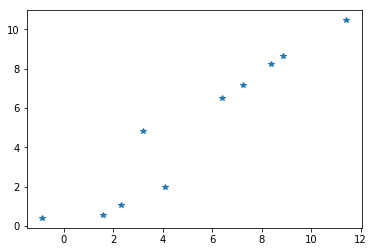

In [61]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [66]:
rand_list = np.random.rand(2) # 2 random variables , m and b to be random
rand_list

array([0.37794193, 0.01324101])

In [67]:
m = tf.Variable(rand_list[0])
b = tf.Variable(rand_list[1])

In [72]:
error = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat) ** 2 # we square it to punish for higher errors


In [73]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [74]:
init = tf.global_variables_initializer()

In [107]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 10000
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])

print(final_slope, final_intercept)

0.9354856851745995 0.07069536869078673


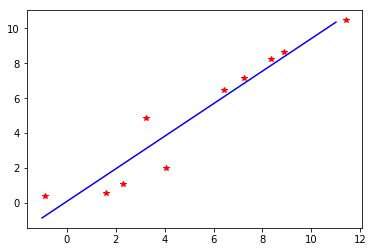

In [108]:
x_test = np.linspace(-1, 11, 10) 
y_predict_plot = final_slope * x_test + final_intercept

plt.plot(x_test, y_predict_plot, c = 'blue')
plt.plot(x_data, y_label, '*', c = 'red')

## Tensorflow (Estimator API) for Regression and Classification Techniques

Purpose of tf is to try and solve problems which ML algorithms can not solve. For example, image recognition, classification, RNN - text detection etc. 

API used: tf.estimator

In [32]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
plt.style.use('fivethirtyeight')

In [9]:
x_data = np.linspace(0, 10.0, 1000000)

In [10]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [11]:
noise = np.random.randn((len(x_data)))

y = mx + b

( m = 0.5 and b = 5 ) -- initial params

In [12]:
y_true = (0.5 * x_data + 5) + noise

In [34]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [35]:
x_df.head(2)
# y_df.head(2)

,X_Data
0,0.00000
1,0.00001


In [36]:
data = pd.concat([x_df, y_df], axis = 1) # axis = 1 means along the column

In [128]:
data.head(5)

,X_Data,Y
0,0.00000,4.917151
1,0.00001,6.078071
2,0.00002,4.091082
3,0.00003,4.219464
4,0.00004,4.739096


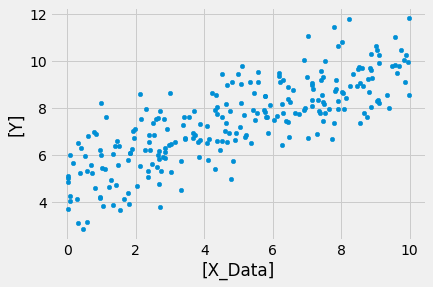

In [37]:
# get a few samples from the data, and plot
data.sample(n = 250).plot(kind = 'scatter', x = ['X_Data'], \
                                        y = ['Y'])

We train batch by batch because 1 million data to input to a NN may increase the computational time. That's why called, batch-wise training.

In [133]:
batch_size = 8 # 8 points at a time

In [139]:
rand_list = np.random.randn(2)
rand_list

array([-0.09140809, -0.03826566])

In [141]:
m = tf.Variable(-0.091)
b = tf.Variable(-0.038)

In [142]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [145]:
# define our graph - next step
y_model = m * xph + b

In [146]:
error = tf.reduce_sum(tf.square(yph - y_model)) # loss function
# tf.square for pow 

In [147]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error) # minimize the error function 

In [149]:
init = tf.global_variables_initializer()

In [153]:
with tf.Session() as sess:
    sess.run(init) # initializes the variables
    # decide number of batches to run through this
    train_numbers = 10000 # total batches = 8000 
    for i in range(train_numbers):
        # choose random 8 data points
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])

In [155]:
model_m, model_b

(0.5023327, 5.062884)

In [156]:
y_hat = model_m * x_data + model_b

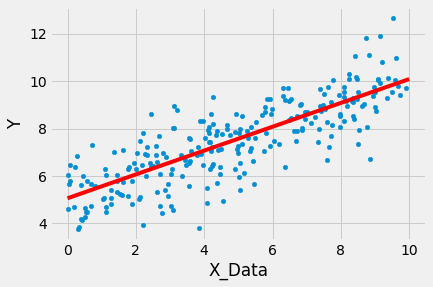

In [159]:
data.sample(250).plot(kind = 'scatter', x = 'X_Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

In [160]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV

In [2]:
# clf = svm.SVC()
# clf.fit(data['X_Data'].sample(1000), data['Y'].sample(1000))
# # clf_predictions = clf.predict()

### Tensorflow Estimator API

1. tf.estimator.LinearrClassifier
2. tf.estimator.LinearRegressor
3. tf.estimator.DNNClassifier
4. tf.estimator.DNNRegressor

and more.

### Using tf.estimator API

1. Define list of feature columns. (Special estimator data type)

2. Data input function : input can be numpy arrays OR pandas dataframe.

3. Call evaluator to test on test data.

In [3]:
feat_cols = [ tf.feature_column.numeric_column('x', shape = [1]) ]

In [4]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [5]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxjnyfrm3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7b7719f7f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true,
                                                   test_size = 0.3)

In [14]:
print(x_train.shape)

(700000,)


In [16]:
input_func = tf.estimator.inputs.numpy_input_fn({'x' : x_train}, y_train,
                                               batch_size = 8,
                                               num_epochs = None, 
                                               shuffle = True)
# can take inputs from pandas data frame as well

In [18]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x' : x_test}, y_test,
                                               batch_size = 8,
                                               num_epochs = 1000, 
                                               shuffle = False)
# can take inputs from pandas data frame as well

In [22]:
train_metrics = estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxjnyfrm3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmpxjnyfrm3/model.ckpt.
INFO:tensorflow:loss = 8.324156, step = 1001
INFO:tensorflow:global_step/sec: 849.86
INFO:tensorflow:loss = 18.831493, step = 1101 (0.119 sec)
INFO:tensorflow:global_step/sec: 930.612
INFO:tensorflow:loss = 5.4567356, step = 1201 (0.108 sec)
INFO:tensorflow:global_step/sec: 1029.82
INFO:tensorflow:loss = 12.300073, step = 1301 (0.097 sec)
INFO:tensorflow:global_step/sec: 1004.65
INFO:tensorflow:loss = 14.668066, step = 1401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1108.18
INFO:tensorflow:loss = 3.2325385, step = 1501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1066.38
INFO:tensorflow:loss = 6.19598

In [23]:
train_data_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-27-05:39:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxjnyfrm3/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-27-05:39:31
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0199085, global_step = 2000, loss = 8.159268


In [24]:
test_data_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-27-05:39:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxjnyfrm3/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-27-05:39:39
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0112013, global_step = 2000, loss = 8.08961


In [25]:
print('TRAINING DATA METRICS')
print(train_data_metrics)
print('\n')
print('TEST DATA METRICS')
print(test_data_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0199085, 'loss': 8.159268, 'global_step': 2000}


TEST DATA METRICS
{'average_loss': 1.0112013, 'loss': 8.08961, 'global_step': 2000}


### Prediction of new values

In [26]:
x_predict = np.linspace(0, 10, 10) # 10 points 
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x' : x_predict},
                                                     shuffle=False)

In [28]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxjnyfrm3/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.864742], dtype=float32)},
 {'predictions': array([5.447288], dtype=float32)},
 {'predictions': array([6.0298347], dtype=float32)},
 {'predictions': array([6.612381], dtype=float32)},
 {'predictions': array([7.194927], dtype=float32)},
 {'predictions': array([7.7774734], dtype=float32)},
 {'predictions': array([8.36002], dtype=float32)},
 {'predictions': array([8.942566], dtype=float32)},
 {'predictions': array([9.525113], dtype=float32)},
 {'predictions': array([10.107659], dtype=float32)}]

In [30]:
predictions = []

for pred_dict in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred_dict['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxjnyfrm3/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


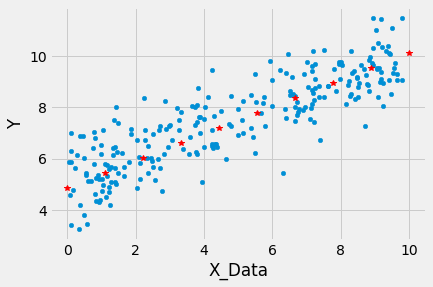

In [43]:
data.sample(n=250).plot(kind='scatter', x='X_Data', y = 'Y')
plt.plot(x_predict, predictions, 'r*')